Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MODELI PROTOKA SAOBRAĆAJA (2)
## 20.04.2021. 

# Pavle Janevski 2020/0055

***
<font color='red'>
Preimenovati svesku: File/Rename u __saobracaj2_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 1__: Model sa promenljivom brzinom
Simulirati model protoka saobraćaja koji je modelovan parcijalnom diferencijalnom jednačinom:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + \frac{\partial}{\partial x}\left(v(\rho)\rho(x,t)\right) = 0
\end{equation}

u kome brzina vozila nije konstantna već zavisi od gustine (a samim tim i od koordinate $x$ i vremena $t$). 

U fajlu <font color='blue'>traffic_data.csv</font> nalaze se podaci dobijeni snimanjem protoka saobraćaja u Linkoln tunelu, koji prolazi ispod reke Hadson i povezuje Nju Džersi sa centrom Menhetna. U prvoj koloni nalazi se gustina vozila (data u jedinicama kola/milji) a u drugoj koloni njhova brzina (data u jedinicama milja/sat).

a) Koristeći se pandas bibliotekom, napraviti Python skriptu u okviru koje treba učitati .csv fajl, a zatim konvertovati jedinice u kola/kilometru (1/km) i kilometar/sat (km/h) i prikazati ovu zavisnost u okviru jednog scatter grafika. Obeležiti ose grafika. 

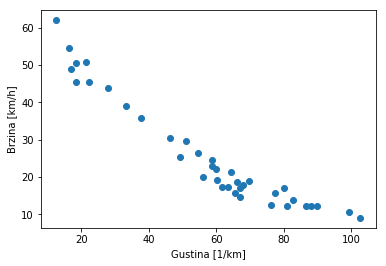

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy import optimize

traffic_data = pd.read_csv('traffic_data.csv')
convert = 1.60934
gustina = traffic_data.gustina / convert
brzina = traffic_data.brzina*convert
plt.scatter(gustina,brzina)
plt.xlabel('Gustina [1/km]')
plt.ylabel('Brzina [km/h]')
plt.show()

Grinšilds-ov model pretpostavlja linearnu zavisnost brzine od gustine i dat je sledećom linearnom funkcijom:

\begin{equation}
    v(\rho) = v_\text{m}\left(1 - \frac{\rho}{\rho_\text{m}}\right)
\end{equation}

gde je $v_\text{m}$ maksimalna brzina vozila, a $\rho_\text{m}$ maksimalna gustina vozila (kada bi sva vozila bila pozicionirana jedna iza drugog, bez razmaka). 

b) Koristeći <font color='blue'>scipy.optimize.curve_fit</font> (Python funkcija koja povlači optimalnu pravu kroz dati skup tačaka, pogledati help) pronaći koeficijente $v_\text{m}$ i $\rho_\text{m}$ koji definišu optimalnu pravu. Koeficijente pronaći u jedinicama km/h i 1/km, respektivno. Nacrtati grafik na kome su eksperimentalni podaci nacrtati crvenim tačkama, a optimalna prava plavom linijom. Obeležiti ose grafika i na grafik staviti legendu. 

(Napomena: ukoliko se čini da je dobijena maksimalna brzina vozila previše mala, treba imati na umu da u tunelu postoji rigorozno ograničenje brzine. Proveriti dobijenu vrednost iz Python modela sa realnim ograničenjem koje se može naći na linku: https://en.wikipedia.org/wiki/Lincoln_Tunnel pod stavkom “operating speed”).


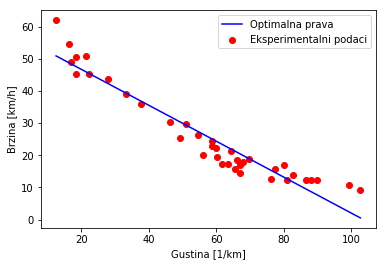

57.910548951700484 103.54923585780462


In [21]:
def v_ro(ro, v_m, ro_m):
    return v_m*(1 - ro / ro_m)

popt , pcov  = optimize.curve_fit(v_ro, gustina, brzina)
v_m, ro_m = popt
x = np.linspace(min(gustina), max(gustina), 200)
y = v_ro(x, v_m, ro_m)
plt.scatter(gustina,brzina,color = 'red', label = 'Eksperimentalni podaci')
plt.plot(x,y,label = 'Optimalna prava', color = 'blue')
plt.xlabel('Gustina [1/km]')
plt.ylabel('Brzina [km/h]')
plt.legend()
plt.show()
print(v_m, ro_m)

Uneti dobijene vrednosti za $v_\text{m}$ i $\rho_\text{m}$.

- $v_\text{m}$ = 57.91055 [km/h]
- $\rho_\text{m}$ = 103.54924 [1/km]

c) Uzimajući u obzir funkcijsku zavisnost brzine od gustine, srediti jednačinu u oblik pogodan za primenu metode konačnih razlika, tako da jednačina ima formu:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + c(\rho)\frac{\partial\rho(x,t)}{\partial x} = 0
\end{equation}

gde je $c(\rho)$ funkcija u kojoj kao promenljiva figuriše samo gustina $\rho$, a kao konstante maksimalna brzina $v_\text{m}$ i maksimalna gustina $\rho_\text{m}$. Napisati dobijenu funkciju $c(\rho)$:

Uneti izraz za $c(\rho)$.

$$\frac{\partial \rho(x, t)}{\partial t} + \frac{\partial (\rho(x, t) v(x, t))}{\partial x} = 0$$
$$\frac{\partial (\rho(x, t) v_m (1 - \frac{\rho(x, t)}{\rho_m}))}{\partial x}
= \frac{\partial(\rho(x, t) v_m - \frac{\rho(x, t)^2 v_m}{\rho_m})}{\partial x} = \left(v_m - \frac{2 \rho(x, t) v_m}{\rho_m}\right) \frac{\partial \rho(x, t)}{\partial x}$$
$$c(\rho) = v_m\left(1 - \frac{2\rho}{\rho_m}\right)$$

d)	U daljem nastavku Python skripte primeniti metodu konačnih razlika za rešavanje gornje parcijalne diferencijalne jednačine koja modeluje protok saobraćaja. Na gornju jednačinu primeniti metodu konačnih razlika za sledeće parametre:

<ol>
    <li>Ukupna dužina posmatranog puta $L = 2.4$ km,</li>
    <li>Vremenski domen za rešavanje $T = 180$ sekundi,</li>
    <li>Koraci diskretizacije: $\Delta x = 0.05$ km, $\Delta t = 0.1$ s.</li>
</ol>

Za rešavanje jednačine potrebno je poznavanje početnog, odnosno graničnog uslova. Početni i granični uslov treba definisati tako da se modeluje semafor koji na koordinati $x = 0$ u trenutku $t = 0$ prelazi iz crvenog u zeleno. Pretpostavka je da je crveno svetlo na semaforu trajalo dovoljno dugo tako da se u trenutku $t = 0$ sva vozila nalaze iza semafora, a da ispred semafora nema nijednog vozila. Simulirati dan kada je na putu nije bilo velike gužve, tj. kada gustina vozila iza semafora ima vrednost $0.3\rho_\text{m}$.


- ro(0,t) = 0.3*ro_m
- ro(x,0) = 0 , x > 0

Nacrtati 3D grafik zavisnosti gustine vozila $\rho$ u funkciji od $x$ i $t$. Obeležiti ose grafika. 

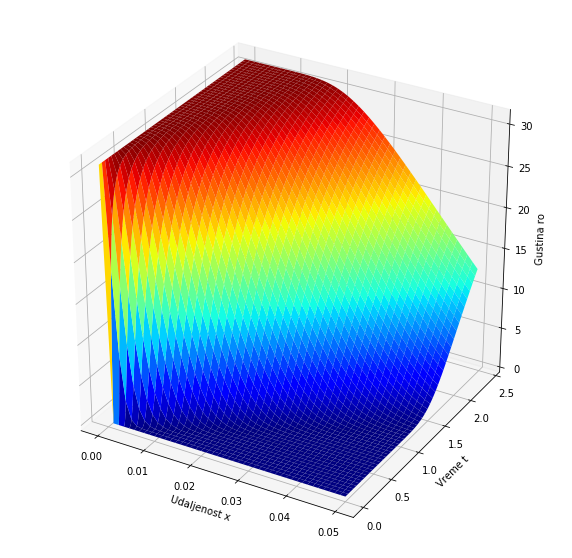

In [22]:
L = 2.4
T = 180 / 60 / 60
dx = 0.05
dt = 0.1 / 60 / 60

def c(ro):
    return v_m*(1 - 2*ro/ro_m)

mh = int(L / dx) - 1
mw = int(T / dt) - 1
mat = np.zeros((mh,mw))
for i in range(0,mw):
    mat[0,i] = 0.3*ro_m
    
for x in range(1,mh):
    for t in range(mw-1):
        mat[x, t+1] = mat[x,t] - (c(mat[x,t])*dt)/dx*(mat[x,t] - mat[x-1,t])
        
x = np.linspace(0,L,mw)
y = np.linspace(0,T,mh)
X, Y = np.meshgrid(y,x)
fig = plt.figure(0, figsize = (10,10))
ax = fig.gca(projection = '3d')
ax.plot_surface(X,Y,np.transpose(mat), cmap = 'jet', linewidth = 0, antialiased = True)
ax.set_xlabel('Udaljenost x')
ax.set_ylabel('Vreme t')
ax.set_zlabel('Gustina ro')
plt.show()

Nacrtati 2D grafik zavisnosti gustine vozila $\rho$ u funkciji od $x$ za tri vremenska trenutka (izabrati po želji, recimo $t = 100$, $120$ i $160$ sekudni ili neka druga tri vremenska trenutka koja bolje demonstriraju dinamiku promene gustine vozila). Obeležiti ose grafika i uneti legendu. 

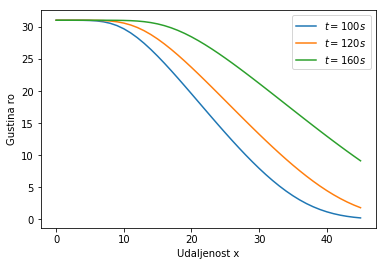

In [23]:
x = np.arange(mh)
t_arr = [100,120,160]
for t in t_arr:
    t_h = t / 60 / 60
    plt.plot(x,mat[:,int(t_h / T * mw)], label = f'$t = {t}s$')
plt.xlabel('Udaljenost x')
plt.ylabel('Gustina ro')
plt.legend()
plt.show()

Komentarisati dobijene grafike i na osnovu njih objasniti ponašanje vozila u ovakvom modelu. 

Sa 2D grafika vidimo da vremenom gustina sporije opada po x osi. Na pocetku se automobili mogu kretati maksimalnom brzinom, dok kasnije, kada se tunel popuni, gustina tezi nekoj konstanti. Sa 3D grafika vidimo naglo opadanje gustine na pocetku i kasnije sve manje opada.

Diskutovati šta se dešava kada bi gužva na putu bila jako velika, odnosno kada bi gustina vozila iza semafora bila jako velika ($0.8\rho_\text{m}$). Ponoviti prethodni 3D kao i 2D grafik za promenjeni granični/početni uslov. 

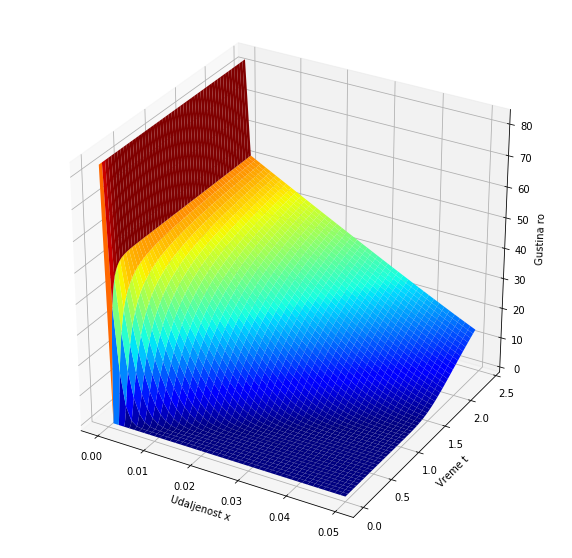

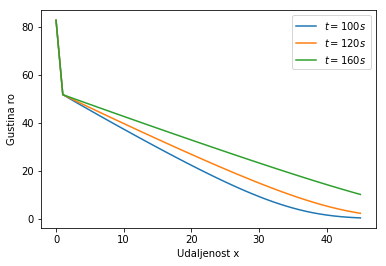

In [24]:
mat = np.zeros((mh,mw))
for i in range(0,mw):
    mat[0,i] = 0.8*ro_m
    
for x in range(1,mh):
    for t in range(mw-1):
        mat[x, t+1] = mat[x,t] - (c(mat[x,t])*dt)/dx*(mat[x,t] - mat[x-1,t])
        
x = np.linspace(0,L,mw)
y = np.linspace(0,T,mh)
X, Y = np.meshgrid(y,x)
fig = plt.figure(0, figsize = (10,10))
ax = fig.gca(projection = '3d')
ax.plot_surface(X,Y,np.transpose(mat), cmap = 'jet', linewidth = 0, antialiased = True)
ax.set_xlabel('Udaljenost x')
ax.set_ylabel('Vreme t')
ax.set_zlabel('Gustina ro')
plt.show()

x = np.arange(mh)
for t in t_arr:
    t_h = t / 60 / 60
    plt.plot(x, mat[:,int (t_h / T * mw)], label = f'$t = {t}s$')
plt.xlabel('Udaljenost x')
plt.ylabel('Gustina ro')
plt.legend()
plt.show()

Sada, za razliku od proslog puta vidimo da gustina na pocetku znacajno brze opada. Kasnije sa vremenom opada sve manje,
sto je posledica zagusenja u tunelu.